In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


data = pd.read_csv('train.csv')

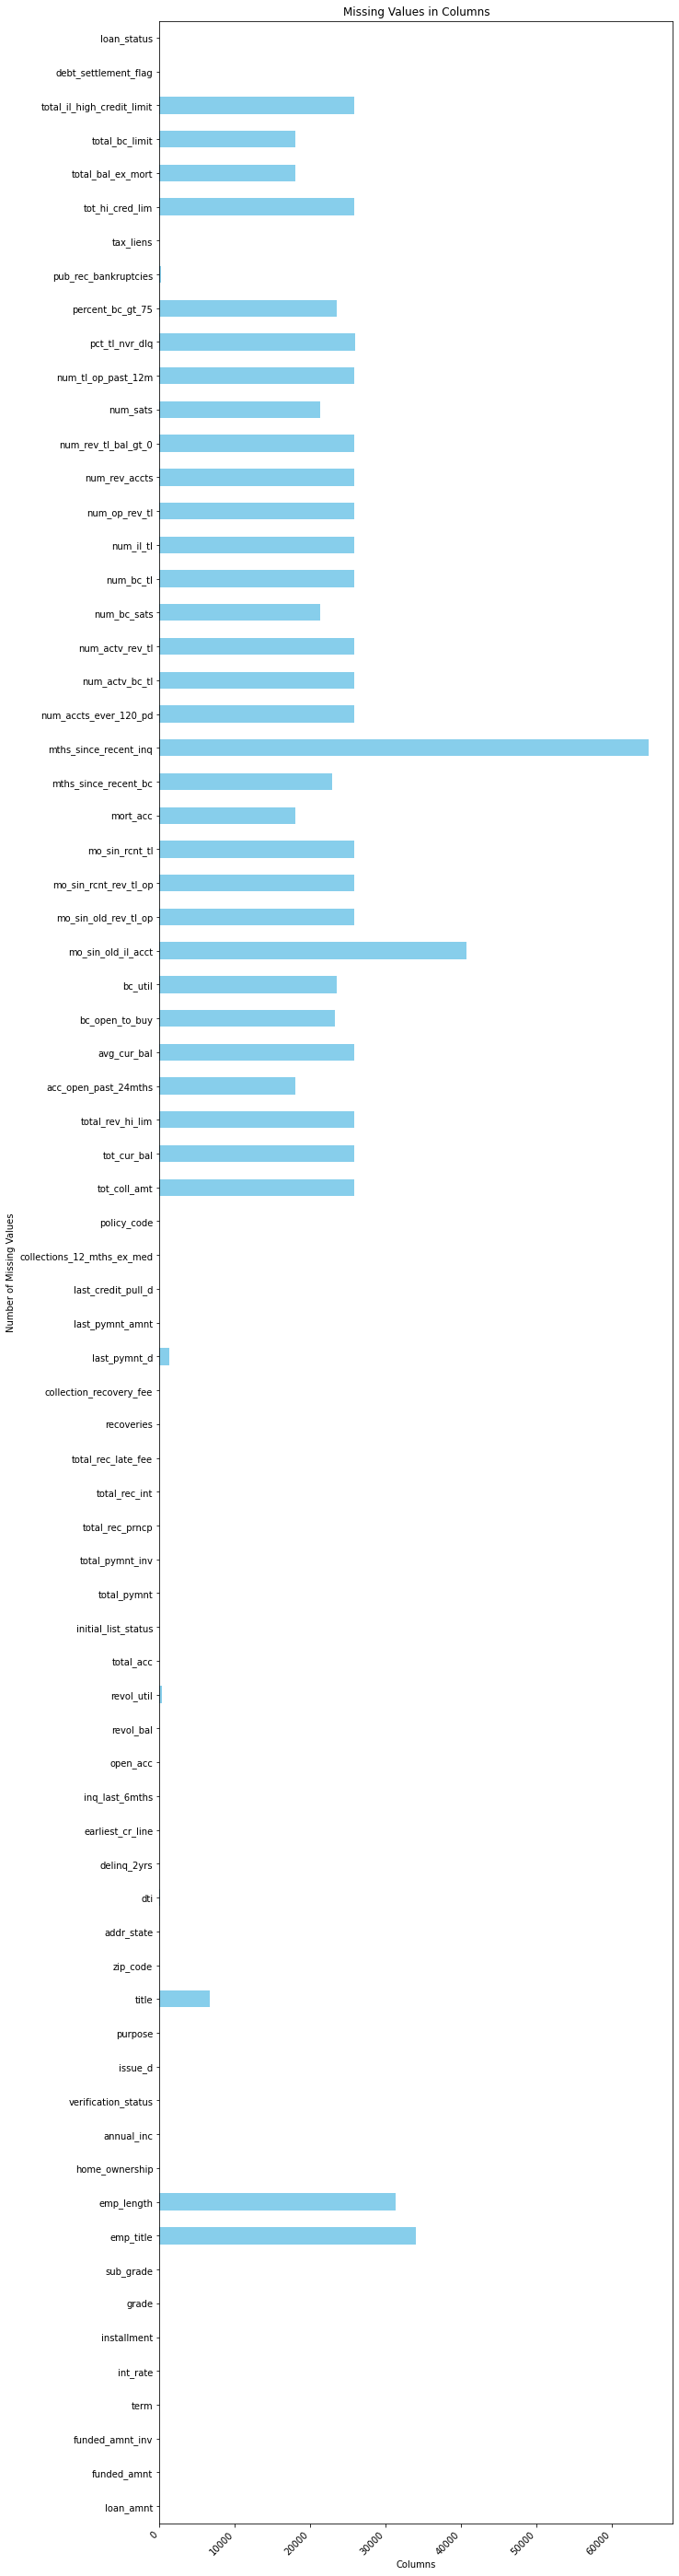

In [373]:

#remove cols
with open("C:\\Users\\vidus\\Desktop\\ml hw\\a.txt", 'r') as file:
    for line in file:
        col = line.strip()
        data = data.drop(col, axis=1)

for col in data.columns:
    if data[col].isnull().sum() > 103558:
        data = data.drop(col, axis=1)


missing_values_count = data.isnull().sum()


plt.figure(figsize=(10, 50))
missing_values_count.plot(kind='barh', color='skyblue')
plt.title('Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()


Encoding

In [374]:
cols = ["home_ownership", "verification_status", "term", "grade", "initial_list_status", "debt_settlement_flag", "emp_length", "initial_list_status"
]   
data_encoded = pd.get_dummies(data, columns=cols)


y = data_encoded["loan_status"]


cols1 = ["purpose", "title", "emp_title", "issue_d", "zip_code", "addr_state", "earliest_cr_line", "sub_grade", "last_pymnt_d", "last_credit_pull_d"]
for col in cols1:
    dr_frequency_map=data_encoded[col].value_counts().to_dict()
    data_encoded[col] = data_encoded[col].map(dr_frequency_map)

Dealing with skewed cols and other missing values

C:\Users\vidus\AppData\Local\Temp\ipykernel_17372\1846136406.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_cols = data_encoded[numeric_cols].apply(lambda x: skew(x.dropna()))
C:\Users\vidus\AppData\Local\Temp\ipykernel_17372\1846136406.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded[col].fillna(median_value, inplace=True)
C:\Users\vidus\AppData\Local\Temp\ipykernel_17372\

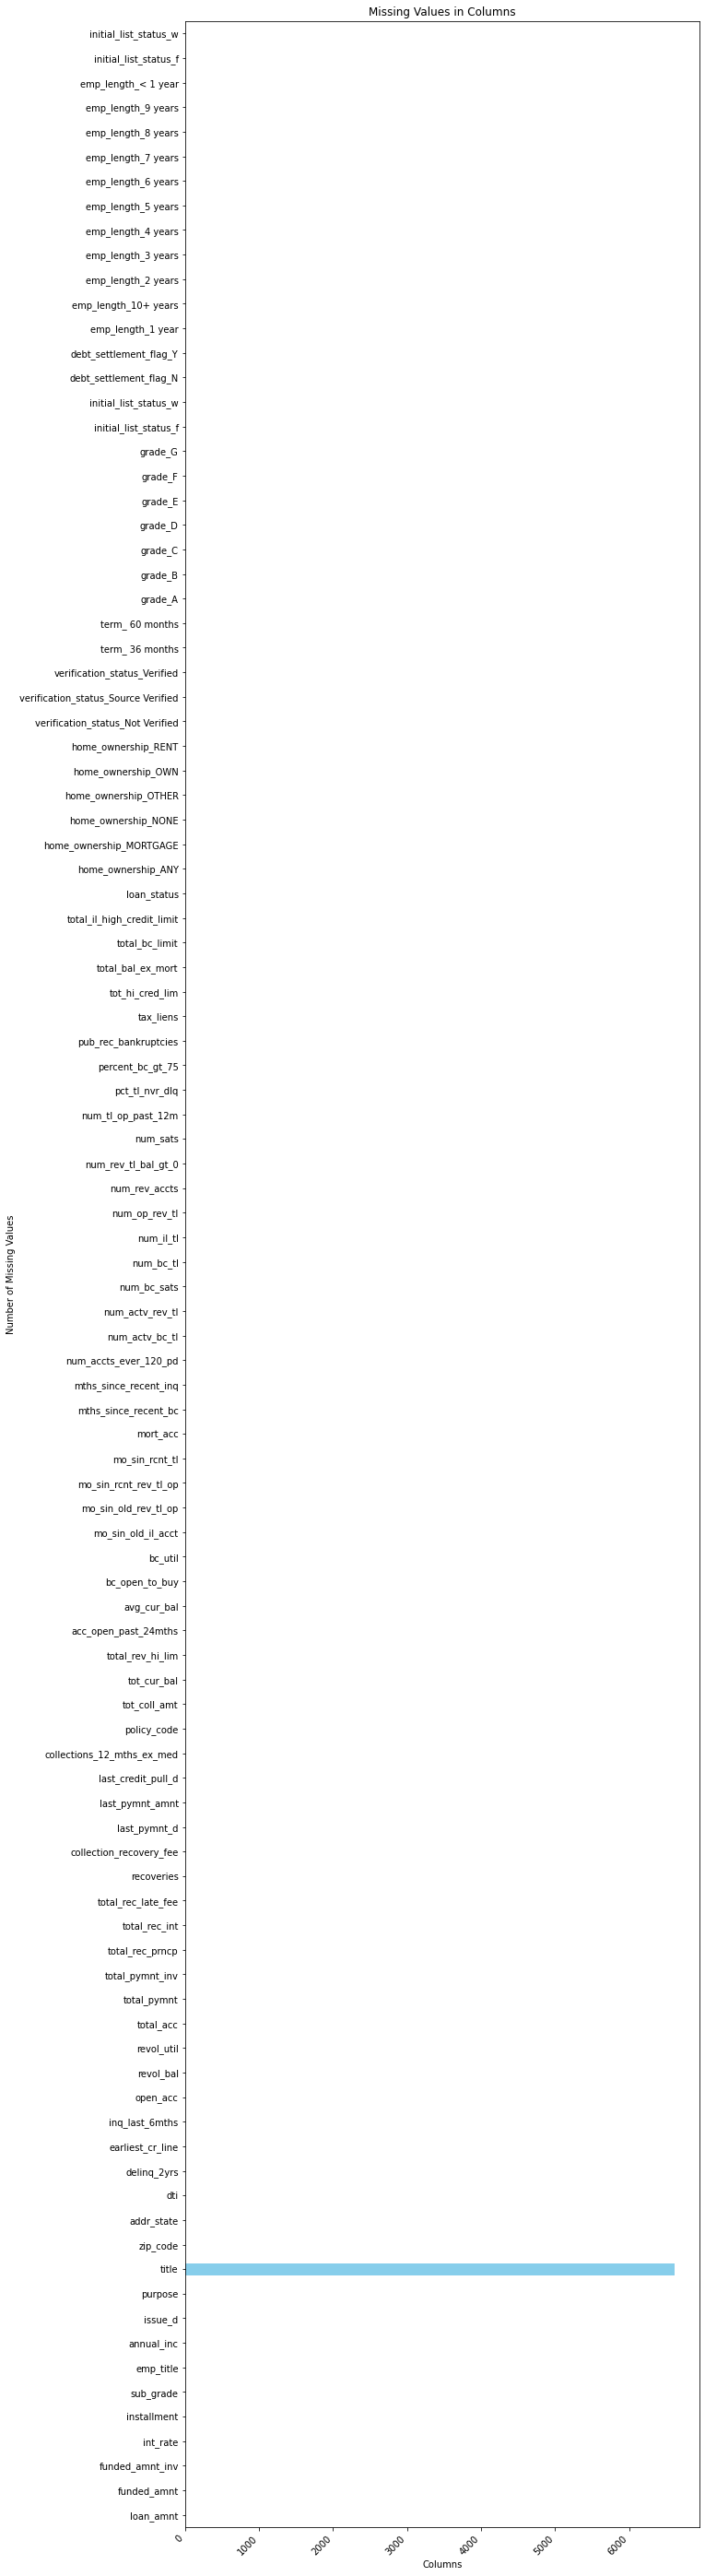

In [375]:
from scipy.stats import skew

# Identify skewed columns (numeric)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns
skewed_cols = data_encoded[numeric_cols].apply(lambda x: skew(x.dropna()))

# Choose a skewness threshold (you can adjust this value)
skew_threshold = 0.5
skewed_cols = skewed_cols[abs(skewed_cols) > skew_threshold].index

# Replace missing values with the median in skewed columns
for col in skewed_cols:
    median_value = data_encoded[col].median()
    data_encoded[col].fillna(median_value, inplace=True)

# Verify that missing values are replaced
# data.isnull().sum()  # Uncomment to check for missing values after replacement
    
fill_mean = ["bc_util", "revol_util", "mo_sin_old_il_acct", "percent_bc_gt_75"]

for col in fill_mean:
    data_encoded[col].fillna(data[col].mean(), inplace=True)


missing_values = data_encoded.isnull().sum()

data_encoded = data_encoded.fillna(value=0)

# Plot a bar graph
plt.figure(figsize=(10, 50))
missing_values.plot(kind='barh', color='skyblue')
plt.title('Missing Values in Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.show()



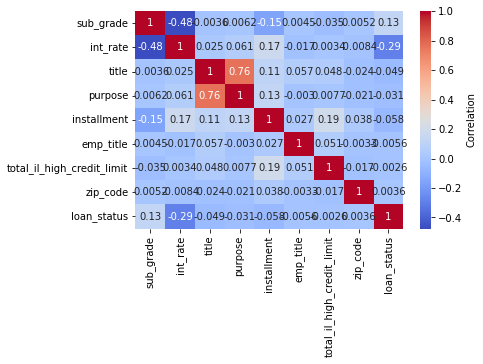

In [377]:
cols1 = ["sub_grade", "int_rate", "title", "purpose", "installment", "emp_title", "total_il_high_credit_limit", "zip_code", "loan_status"]

subset_df1 = data_encoded[cols1]



# Calculate the correlation matrix
correlation_matrix1= subset_df1.corr()


# Display the heatmap
sns.heatmap(correlation_matrix1, cmap='coolwarm', annot=True, cbar_kws={'label': 'Correlation'})
plt.show()


Model

In [ ]:
from sklearn.preprocessing import StandardScaler

data_encoded = data_encoded.drop("loan_status", axis=1)


scaler=StandardScaler()
scaler.fit(data_encoded)
scaled_data=scaler.transform(data_encoded)

from sklearn.decomposition import PCA

pca=PCA(n_components=20,random_state=42)
pca.fit(scaled_data)
X_pca=pca.transform(scaled_data)

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_pca, y)